# Stock Market Analysis



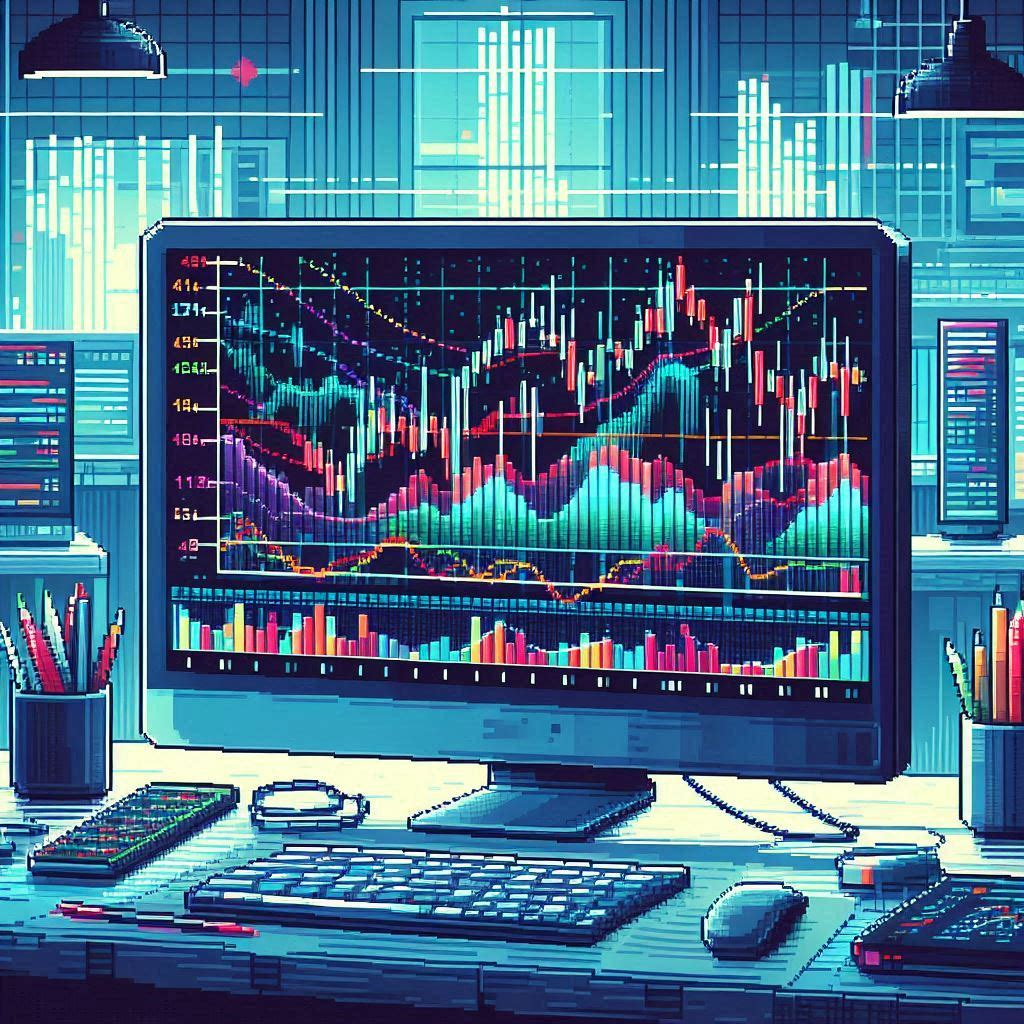

Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, I explored data from the stock market, particularly focusing on some technology stocks (Apple, Amazon, Google, and Microsoft). During this project, I utilized yfinance to obtain stock information and employed Seaborn and Matplotlib to visualize different aspects of the data. I also analyzed the risk of these stocks based on their previous performance history. Additionally, I predicted future stock prices using a Long Short-Term Memory (LSTM) method.

The insights we will be discovering are as follows:
1. **What was the change in price of the stock over time?**
2. **What was the moving average of the various stocks?**
3. **What was the trading volume trend for the stock over time?**
4. **How did the closing prices of different stocks correlate with major market indices?**
5. **What is the Value at Risk (VaR) for the portfolio containing different stocks?**
6. **Predicting the stock price of APPLE Inc. using different machine learning models.( along with LSTM, we'll be using SVR )**

## Getting the Data

The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. Check this article to learn more about yfinance: https://aroussi.com/post/python-yahoo-finance

## 1. What as the change in price of the stock over time?

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr


yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]

company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.head(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-05  191.570007  192.979996  190.619995  191.330002  190.319275   
2023-07-06  189.839996  192.020004  189.199997  191.809998  190.796722   
2023-07-07  191.410004  192.669998  190.240005  190.679993  189.672684   
2023-07-10  189.259995  189.990005  187.039993  188.610001  187.613632   
2023-07-11  189.160004  189.300003  186.600006  188.080002  187.086441   
2023-07-12  189.679993  191.699997  188.470001  189.770004  188.767502   
2023-07-13  190.500000  191.190002  189.779999  190.539993  189.533417   
2023-07-14  190.229996  191.179993  189.630005  190.690002  189.682632   
2023-07-17  191.899994  194.320007  191.809998  193.990005  192.965210   
2023-07-18  193.350006  194.330002  192.419998  193.729996  192.706573   

              Volume company_name  
Date                               
2023-07-05  46920300        APPLE  
2023-07-06  45094300        APPLE  
2023-07-07  46778000        APPLE  
2023-07-10  59922200        APPLE  
2023-07-11  46638100        APPLE  
2023-07-12  60750200        APPLE  
2023-07-13  41342300        APPLE  
2023-07-14  41573900        APPLE  
2023-07-17  50520200        APPLE  
2023-07-18  48353800        APPLE

After reviewing the content of our data,  we can see that the daya is *numeric* and the date is the index of the data.

We can also see that weekends are missing from the records.

Now let's perform some basic data analysis and check our data

### Descriptive Statistics about the Data
Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided.

In [ ]:
# Summary Stats
AAPL.describe()

Open        High         Low       Close   Adj Close  \
count  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   184.401468  186.006270  182.938770  184.491706  184.026902   
std     11.341931   11.526205   11.221791   11.404021   11.456076   
min    165.350006  166.399994  164.080002  165.000000  164.776505   
25%    175.277496  177.052502  173.700005  175.370007  174.801842   
50%    183.735001  185.119995  182.014999  183.989998  183.502808   
75%    191.452503  192.684998  190.247505  191.477497  190.970264   
max    220.000000  221.550003  219.029999  221.550003  221.550003   

             Volume  
count  2.520000e+02  
mean   6.033096e+07  
std    2.474195e+07  
min    2.404830e+07  
25%    4.678918e+07  
50%    5.368500e+07  
75%    6.615335e+07  
max    2.464214e+08

We have 252 records in one year beacause weekends are not included in the data

## Information about the Data

In [ ]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-07-05 to 2024-07-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


## Closing Price
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

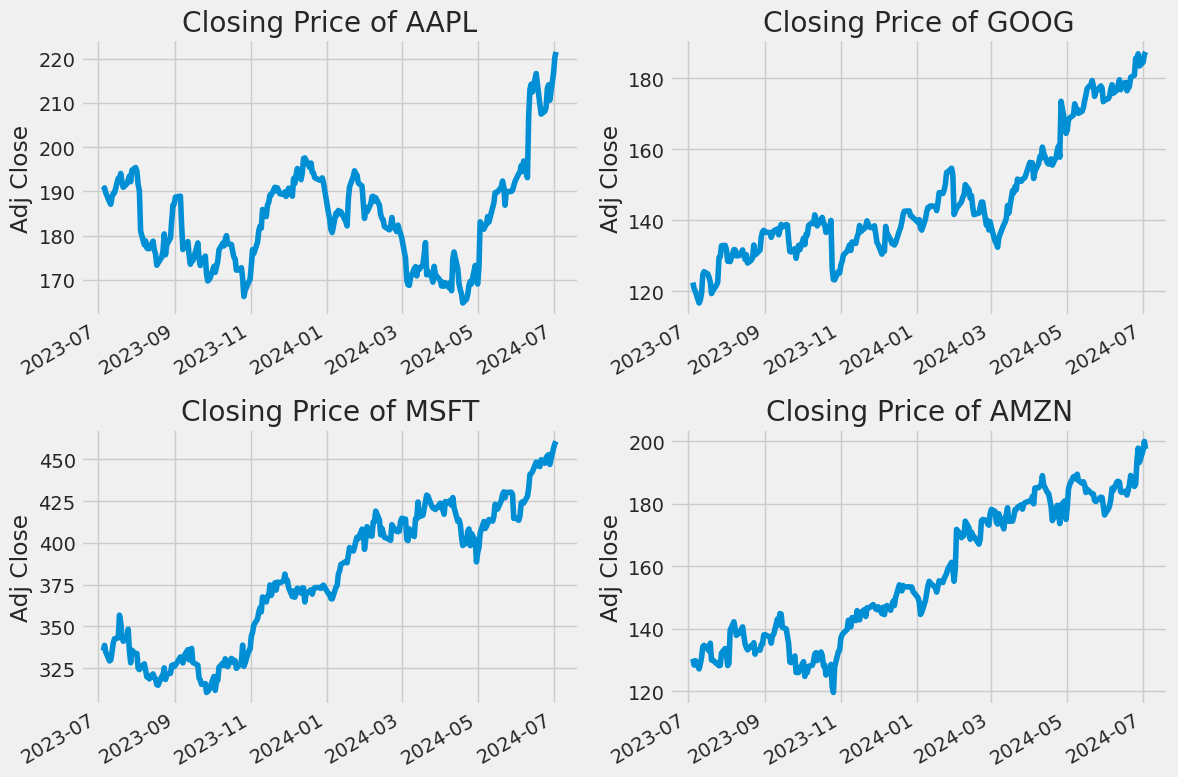

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

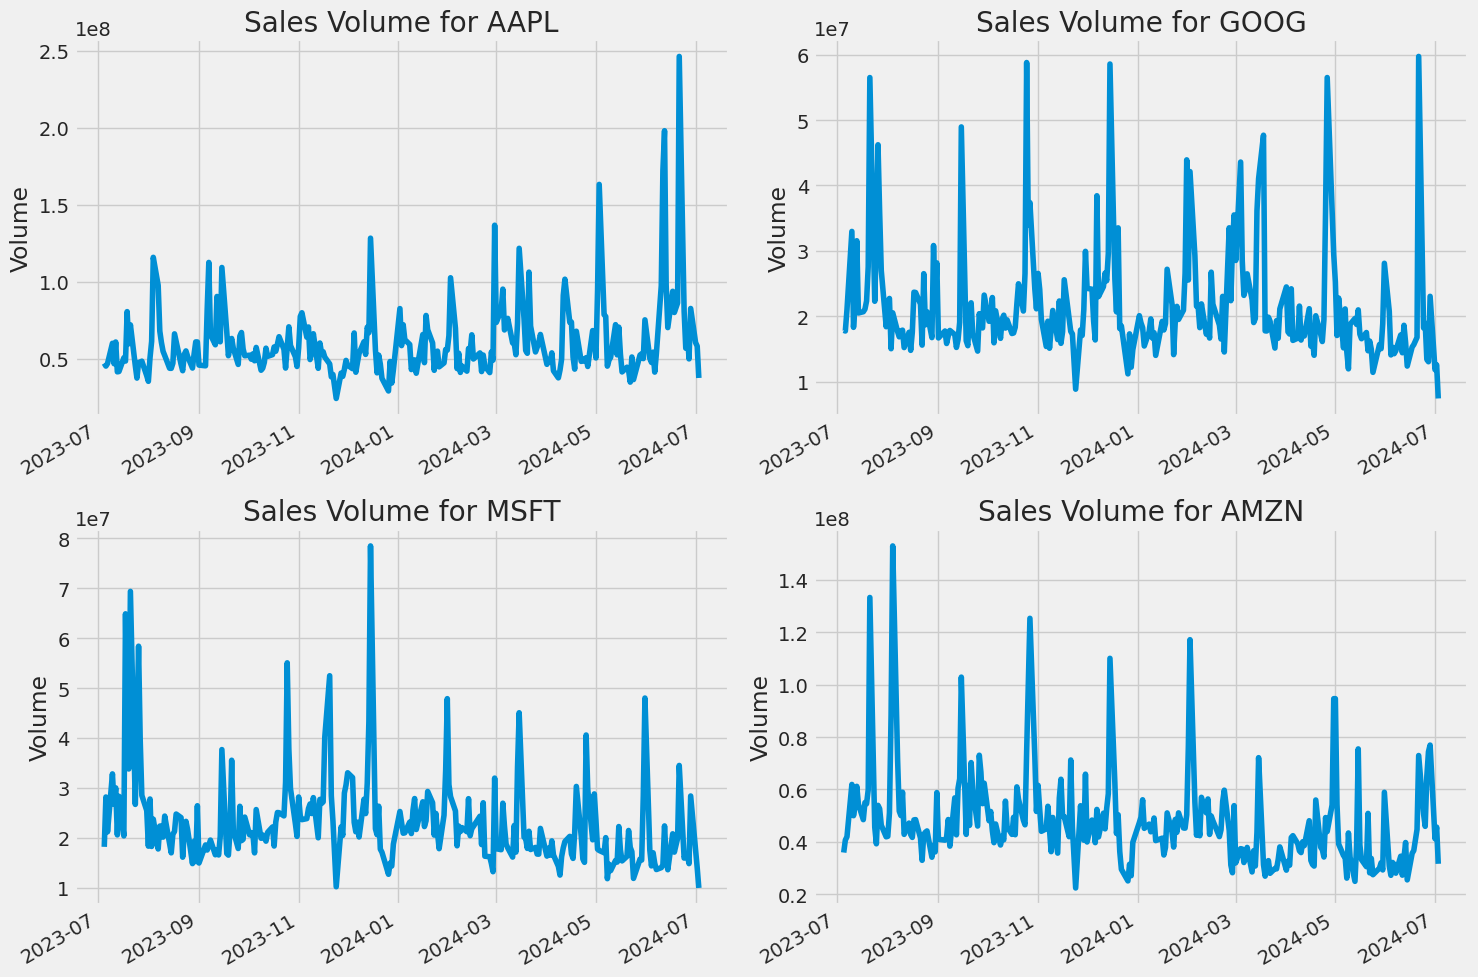

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

## 2. What was the moving average of the various stocks?
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 days, 1 month, or any time period the trader chooses.

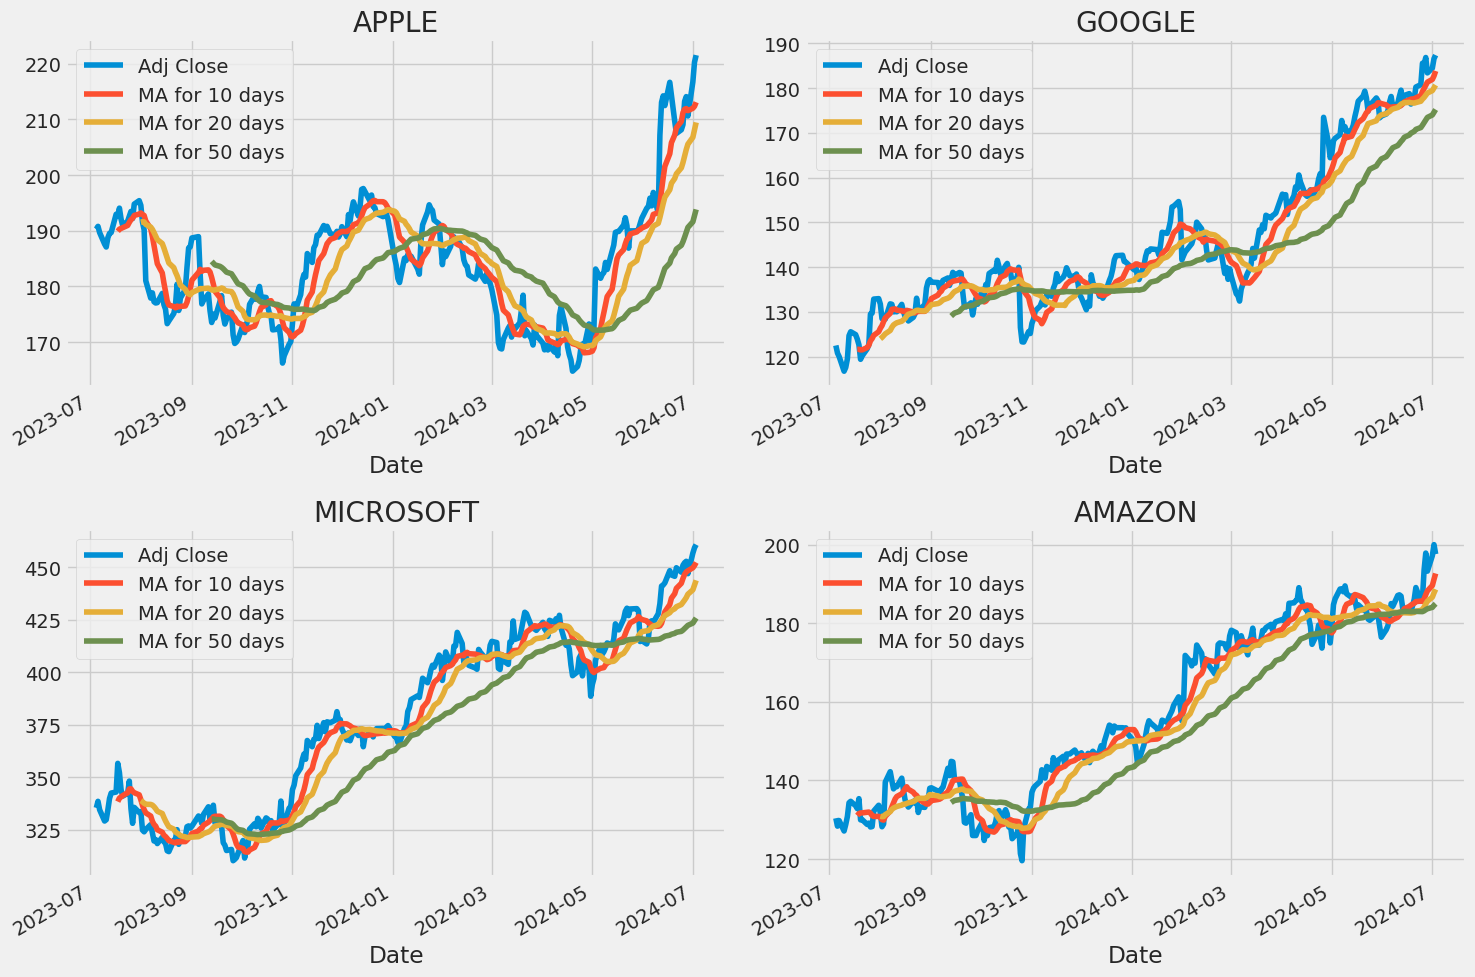

In [ ]:
ma_day = [10, 20, 50] # 10 days, 20 days, 50 days

for ma in ma_day:
  for company in company_list:
    column_name = f"MA for {ma} days"
    company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()


We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

## What was the trading volume trend for the stock over time?

The trading volume trend for a stock over time indicates the number of shares traded within a specific period, such as daily, weekly, or monthly. Analyzing this trend can reveal patterns of investor activity, such as increased volume during significant news events or earnings reports. A rising trading volume often suggests growing interest or liquidity in the stock, whereas a declining volume might indicate reduced investor interest. By examining the trading volume trend, investors can gain insights into market sentiment and the stock's potential volatility.


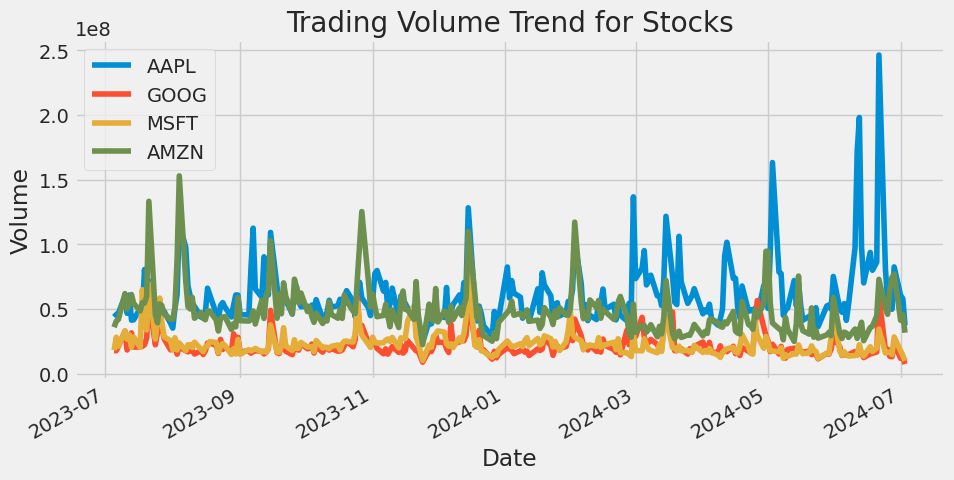

In [ ]:
plt.figure(figsize=(10, 5))

# Loop through each stock in the tech_list
for stock in tech_list:
  # Plot the Volume for each stock
  globals()[stock]['Volume'].plot(label=stock)

plt.legend()

# Set the title of the plot
plt.title("Trading Volume Trend for Stocks")
# x-axis = Date
plt.xlabel("Date")
# y-axis = Volume
plt.ylabel("Volume")
plt.show()


The trading volume trend indicates varying levels of investor activity and interest in these technology stocks, with *Apple* seeing the **most significant** volume fluctuations and Google the least.

## 4. How did the closing prices of different stocks correlate with major market indices?

### Correlation Matrix PLot

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


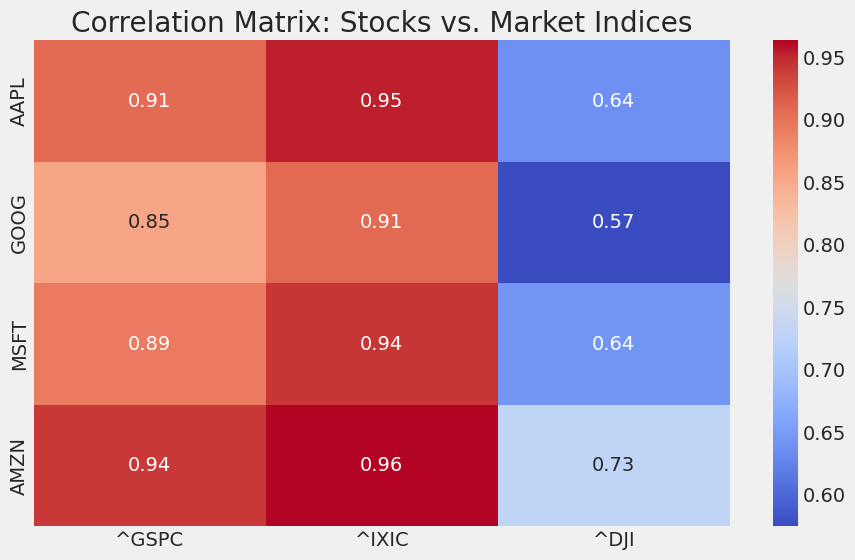

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

#We define the list of stocks and indices
stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
indices = ['^GSPC', '^IXIC', '^DJI']

# ALso the start and end dates
start = '2023-01-01'
end = '2024-01-01'

# Downloading the stock data
stock_data = {}
for stock in stocks:
    stock_data[stock] = yf.download(stock, start, end)['Adj Close']

# Downloading the index
index_data = {}
for index in indices:
    index_data[index] = yf.download(index, start, end)['Adj Close']

# Correlation matrix
correlation_matrix = pd.DataFrame(index=stocks, columns=indices) # Using stocks as index and indices as columns
for stock in stocks:
    for index in indices:
        correlation_matrix.loc[stock, index] = stock_data[stock].corr(index_data[index])

# We have to convert all values in the correlation matrix to numeric, coercing errors to NaN
correlation_matrix = correlation_matrix.apply(pd.to_numeric, errors='coerce')

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm') # Ensure the matrix is of float type
plt.title('Correlation Matrix: Stocks vs. Market Indices')
plt.show()


### Joint Plot
Joint plots combine scatter plots and histograms to show the relationship between two variables along with their distributions.

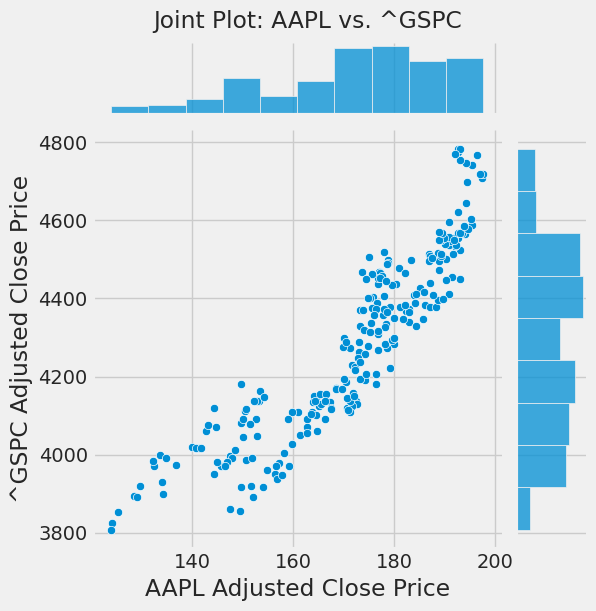

In [ ]:
# Joint Plot for AAPL vs. ^GSPC
sns.jointplot(x=stock_data['AAPL'], y=index_data['^GSPC'], kind='scatter')
plt.suptitle('Joint Plot: AAPL vs. ^GSPC', y=1.02)
plt.xlabel('AAPL Adjusted Close Price')
plt.ylabel('^GSPC Adjusted Close Price')
plt.show()


### Pair Plot

It creates a pair plot for the adjusted close prices of AAPL, GOOG, MSFT, and AMZN. It visualizes the relationships between each pair of stocks using scatter plots and their individual distributions using histograms. This helps in quickly assessing correlations and data distributions among the stocks.



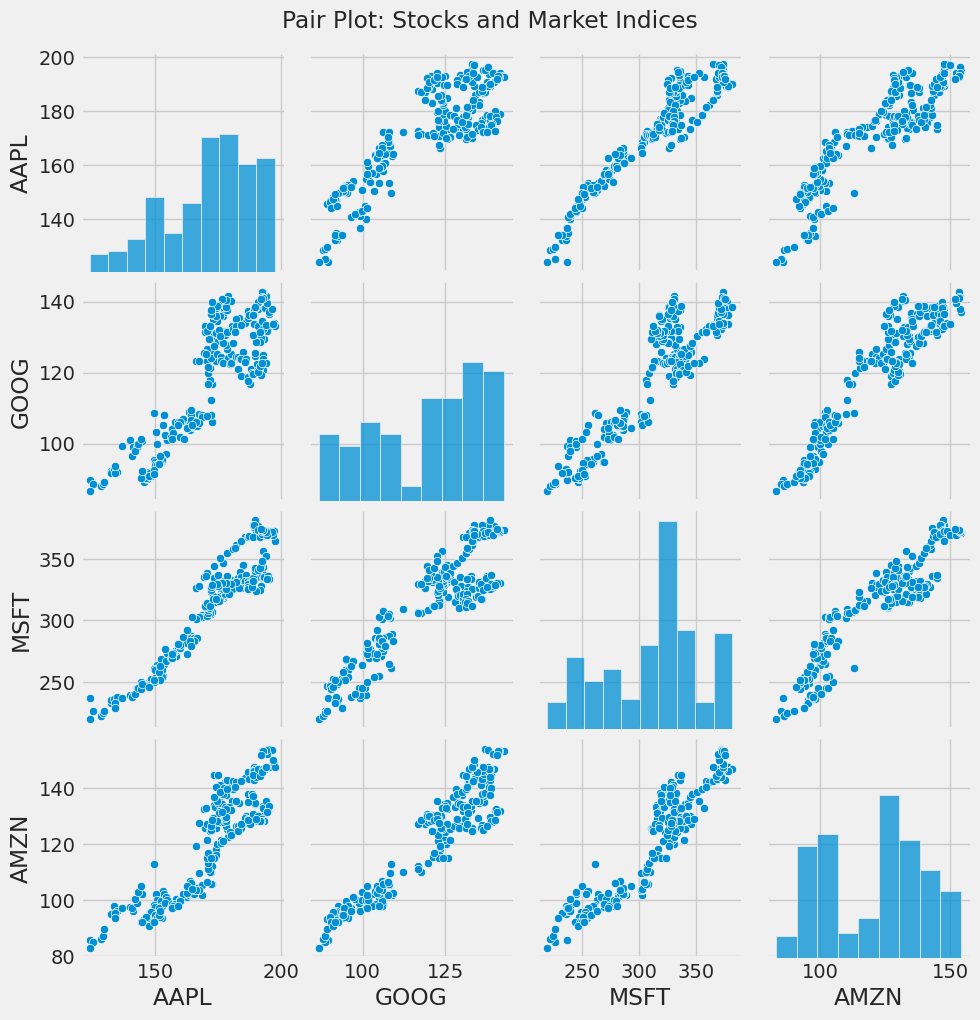

In [ ]:
# Pair Plot for stocks and indices
combined_data = pd.DataFrame({'AAPL': stock_data['AAPL'], 'GOOG': stock_data['GOOG'], 'MSFT': stock_data['MSFT'], 'AMZN': stock_data['AMZN']})

sns.pairplot(combined_data)
plt.suptitle('Pair Plot: Stocks and Market Indices', y=1.02)
plt.show()


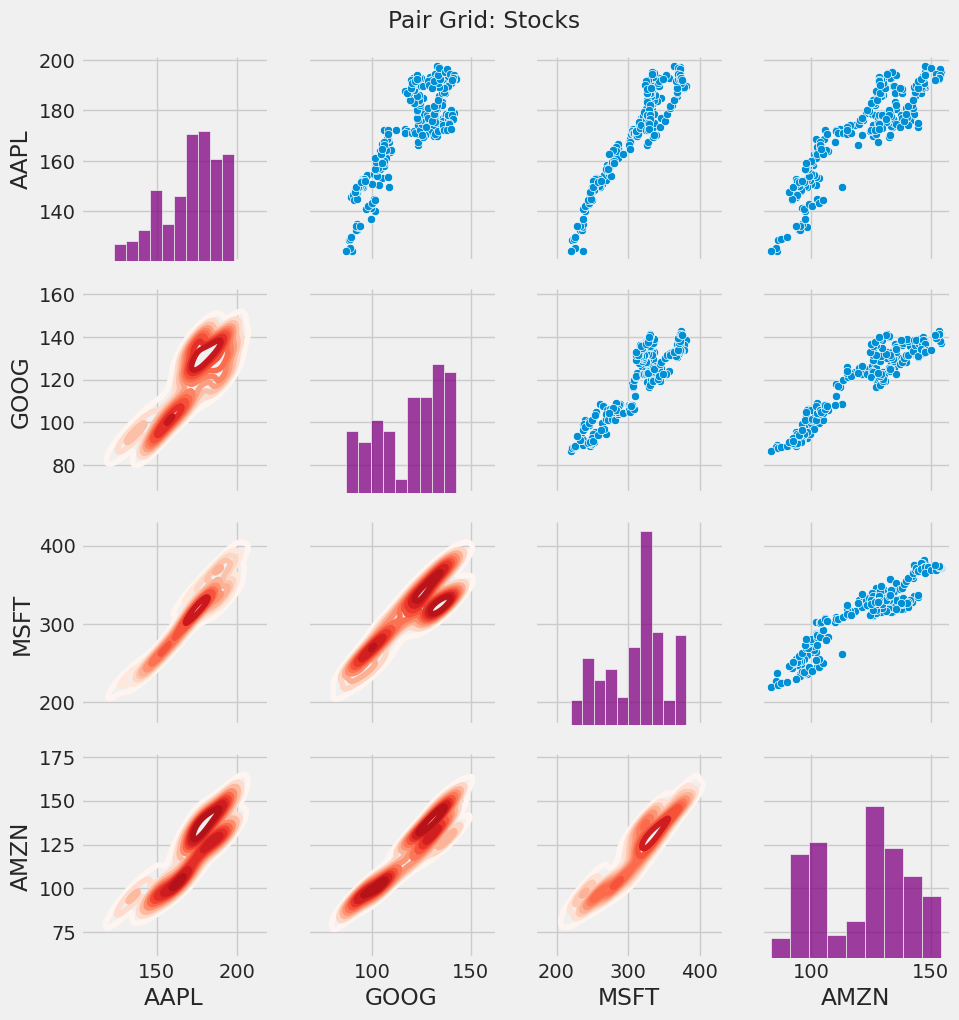

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Combine relevant data into a DataFrame
combined_data = pd.DataFrame({
    'AAPL': stock_data['AAPL'],
    'GOOG': stock_data['GOOG'],
    'MSFT': stock_data['MSFT'],
    'AMZN': stock_data['AMZN']
})

# Define custom color palettes for upper and lower halves
upper_palette = sns.light_palette("navy", reverse=True)

# Create PairGrid
g = sns.PairGrid(combined_data)

# Scatter plots in the upper half
g.map_upper(sns.scatterplot, palette=upper_palette)

# Kde plots in the lower half
g.map_lower(sns.kdeplot, cmap="Reds")

# Histograms on the diagonal
g.map_diag(sns.histplot, color='purple')

plt.suptitle('Pair Grid: Stocks', y=1.02)


plt.show()


## 5. What is the Value at Risk (VaR) for the portfolio containing different stocks?

Value at Risk (VaR) is a statistical measure used to quantify the potential loss in value of a portfolio over a specified time period, under normal market conditions, at a given confidence level. In the context of a portfolio containing different stocks, VaR helps investors and risk managers understand the potential downside risk.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Define the portfolio weights
weights = np.array([0.4, 0.3, 0.2, 0.1])

# Example daily returns for stocks
np.random.seed(0)  # For reproducibility
dates = pd.date_range('2024-01-01', periods=100)  # Example dates
daily_returns_data = np.random.normal(loc=0.001, scale=0.01, size=(100, 4))  # Example daily returns data

# Create DataFrame with proper index and columns
daily_returns = pd.DataFrame(daily_returns_data, columns=['AAPL', 'GOOG', 'MSFT', 'AMZN'], index=dates)

# Calculate the portfolio variance
portfolio_variance = np.dot(weights.T, np.dot(daily_returns.cov(), weights))

# Calculate the standard deviation of the portfolio
portfolio_std = np.sqrt(portfolio_variance)

# Calculate the VaR at the 95% confidence level
VaR_95 = norm.ppf(0.95, loc=0, scale=portfolio_std)

# Print the VaR
print("The VaR for the portfolio at the 95% confidence level is:", VaR_95)


The VaR for the portfolio at the 95% confidence level is: 0.009744234178014014


A VaR of 0.0097 (or 0.97%) at a 95% confidence level indicates that there is a 5% probability that the portfolio could incur a loss greater than 0.97% over the specified time period, assuming normal market conditions. This metric serves as a risk management tool, allowing investors to quantify potential downside exposure.

A lower VaR percentage suggests lower risk and vice versa, influencing portfolio diversification and risk tolerance decisions. However, VaR has limitations, such as its reliance on historical data and assumptions of normal market behavior, underscoring the need for supplementary risk assessment and mitigation strategies in volatile financial environments.

## 6. Predicting the stock price of APPLE Inc. using different machine learning models.( along with LSTM, we'll be using SVR)

In [ ]:
df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-05  191.570007  192.979996  190.619995  191.330002  190.319275   
2023-07-06  189.839996  192.020004  189.199997  191.809998  190.796722   
2023-07-07  191.410004  192.669998  190.240005  190.679993  189.672684   
2023-07-10  189.259995  189.990005  187.039993  188.610001  187.613632   
2023-07-11  189.160004  189.300003  186.600006  188.080002  187.086441   

              Volume company_name  
Date                               
2023-07-05  46920300        APPLE  
2023-07-06  45094300        APPLE  
2023-07-07  46778000        APPLE  
2023-07-10  59922200        APPLE  
2023-07-11  46638100        APPLE

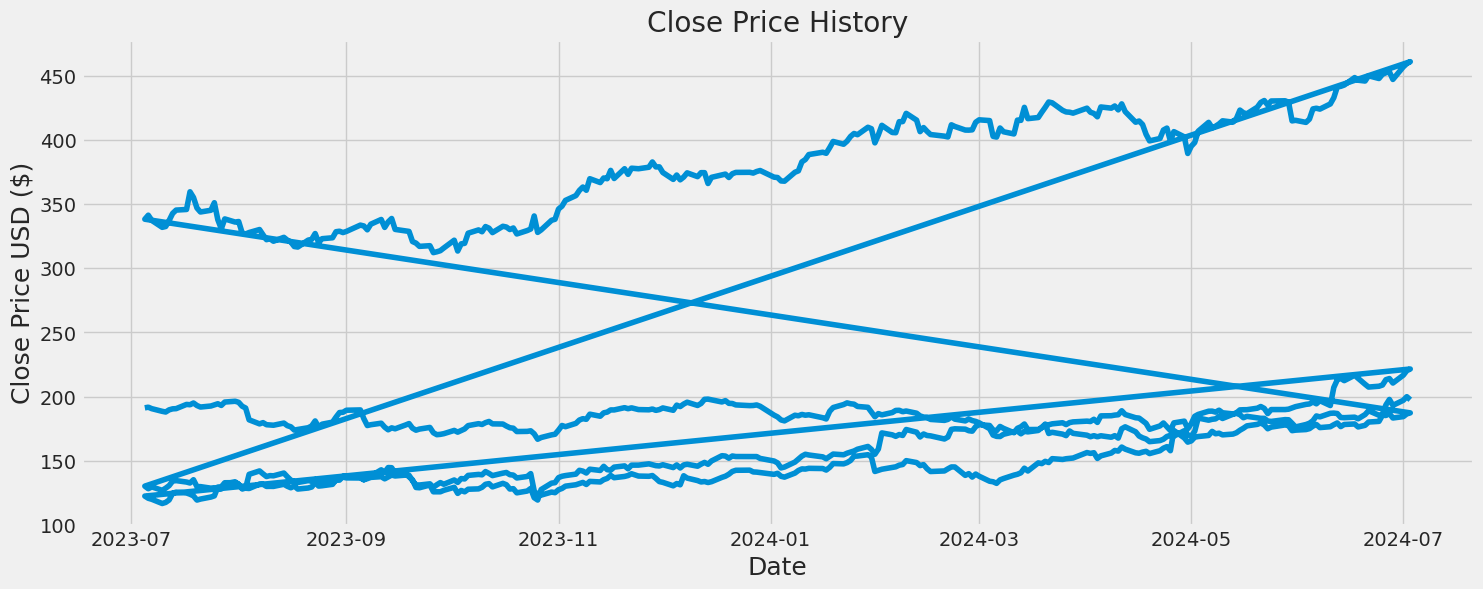

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# create a new dataframe with only the 'Close column'
data = df.filter(['Close'])
# convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

958

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.21651644],
       [0.21791218],
       [0.21462632],
       ...,
       [0.23358534],
       [0.24172725],
       [0.23471939]])

In [ ]:
from sklearn.model_selection import train_test_split

# Create the training data set
train_data = scaled_data[0:int(training_data_len), :]
# Create x_train and y_train from train_data
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape x_train for LSTM input (samples, time steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print the shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (718, 60, 1)
X_test shape: (180, 60, 1)
y_train shape: (718,)
y_test shape: (180,)


### Creating a LSTM model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.model_selection import train_test_split


# Define constants

input_size = 1  # Number of features (in this case, 1 for univariate time series)
hidden_size = 50  # Number of LSTM units
num_layers = 2  # Number of LSTM layers
output_size = 1  # Output size (in this case, predicting one value)

# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader objects for batch processing
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))  # LSTM output
        out = self.fc(out[:, -1, :])  # Last time step output
        return out

# Instantiate the model, loss function, and optimizer
model = LSTMModel(input_size, hidden_size, num_layers, output_size)


### Crearting loss function and optimizier

In [ ]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


### Training our model

In [ ]:
# Training the model
num_epochs = 100
for epoch in range(num_epochs):
    for batch_x, batch_y in train_loader:
        outputs = model(batch_x)
        loss = loss_fn(outputs.squeeze(), batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.0030
Epoch [20/100], Loss: 0.0015
Epoch [30/100], Loss: 0.0007
Epoch [40/100], Loss: 0.0001
Epoch [50/100], Loss: 0.0001
Epoch [60/100], Loss: 0.0002
Epoch [70/100], Loss: 0.0002
Epoch [80/100], Loss: 0.0001
Epoch [90/100], Loss: 0.0002
Epoch [100/100], Loss: 0.0002


### Evaluation and Predictions

In [ ]:
# Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(x_test_tensor)
    test_loss = loss_fn(y_pred.squeeze(), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

print(f"Frist five predicted value: {y_pred[:5]}")

Test Loss: 0.0068
Frist five predicted value: tensor([[0.0933],
        [0.8914],
        [0.0836],
        [0.1586],
        [0.2195]])


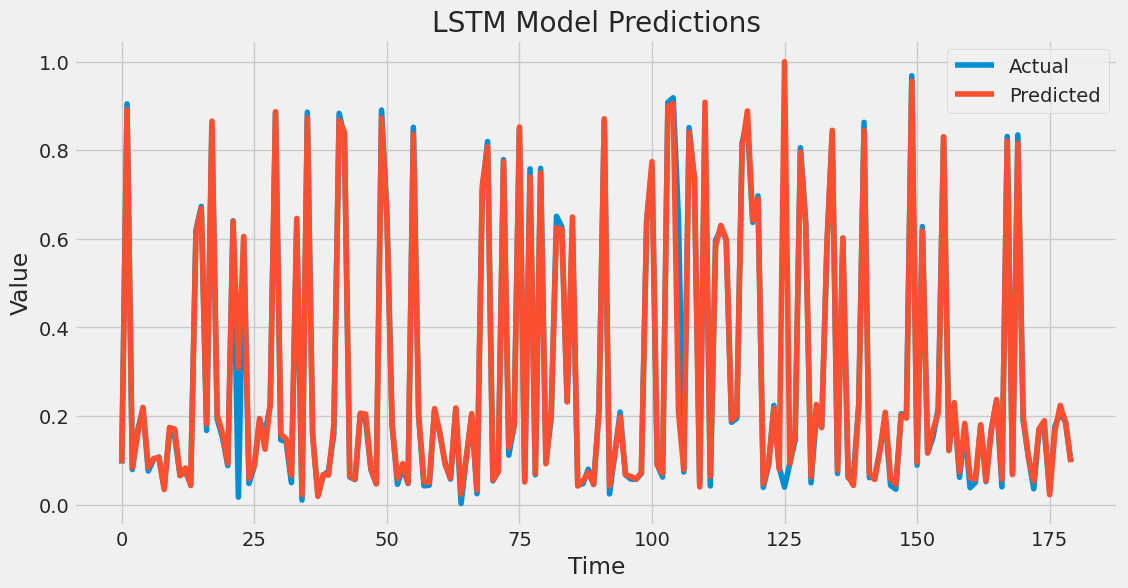

In [96]:
# Convert predictions back to numpy arrays for plotting
#y_pred = y_pred.numpy()
y_test_np = y_test_tensor.numpy()


# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_np, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('LSTM Model Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

### SVR model and training and making predictions

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error



# Reshape data for SVR if necessary (SVR expects 2D arrays)
X_train_svr = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_test_svr = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))

# Create SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Train SVR model
svr.fit(X_train_svr, y_train)

# Predictions on test set
y_pred_svr = svr.predict(X_test_svr)

# Calculate MSE
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"Mean Squared Error (SVR): {mse_svr:.4f}")


Mean Squared Error (SVR): 0.0095


## Summary


Time series data, a sequence of data points indexed in time order, is crucial for data analysts and scientists. In this notebook, I explored stock market data, focusing on technology stocks such as Apple, Amazon, Google, and Microsoft. Using yfinance, I obtained stock information and visualized it with Seaborn and Matplotlib. I analyzed the risk of these stocks based on historical performance and predicted future prices using a Long Short-Term Memory (LSTM) method.

The insights discovered include:

1. Changes in stock prices over time.
2. Moving averages of various stocks.
3. Trading volume trends over time.
4. Correlations between stock closing prices and major market indices.
5. Value at Risk (VaR) for a portfolio of different stocks.
6. Predictions of Apple Inc.'s stock price using different machine learning models, including LSTM and Support Vector Regression (SVR).